In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
dataset = pd.read_csv('all_labelled.csv')
X = dataset[['starting frequency (kHz)','final frequency (kHz)','minimum frequency (kHz)','maximum frequency (kHz)','mean frequency (kHz)','frequency bandwidth (kHz)','syllable duration (msec)','total syllable energy (dB)','peak syllable amplitude (dB)']]
Y = dataset.iloc[:,9]
X= X.dropna(how = 'any')
Y= Y.dropna(how = 'any')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
import imblearn.over_sampling
sm = imblearn.over_sampling.SMOTE(random_state= 12, ratio= 1)
X_trainr, y_trainr = sm.fit_sample(X_train, y_train)
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_trainr, y_trainr)  

/Users/sebastianmensink/miniconda3/envs/python/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 317   63]
 [ 302 3237]]
             precision    recall  f1-score   support

          0       0.51      0.83      0.63       380
          1       0.98      0.91      0.95      3539

avg / total       0.94      0.91      0.92      3919



Text(0,0.5,'Mean Error')

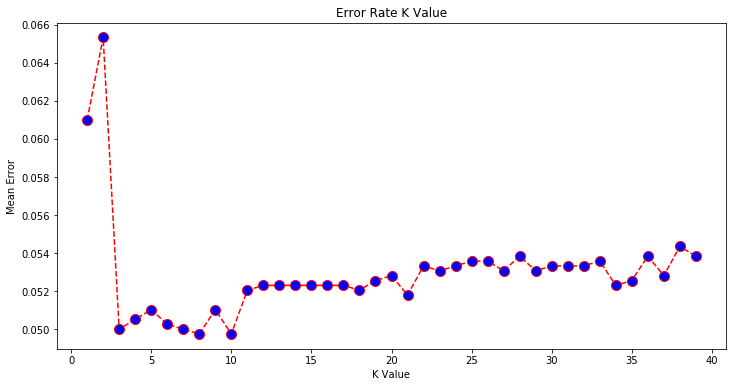

In [16]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [76]:
import pickle
with open('/Users/sebastianmensink/Desktop/MiceClass/Non-NN/knear', 'wb') as f:
    pickle.dump(classifier, f)                                                                                                                                                                                                       


,starting frequency (kHz),final frequency (kHz),minimum frequency (kHz),maximum frequency (kHz),mean frequency (kHz),frequency bandwidth (kHz),syllable duration (msec),total syllable energy (dB),peak syllable amplitude (dB),Clean,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,53.22,62.99,37.60,64.70,51.88,27.10,27.2,2.97,-10.47,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45.65,58.59,42.48,70.80,47.14,28.32,22.4,6.53,-9.66,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70.07,41.26,37.60,90.33,66.38,52.73,203.2,18.48,0.97,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65.67,45.90,45.90,78.86,59.16,32.96,80.0,5.37,-12.13,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36.13,39.55,36.13,79.59,55.49,43.46,99.2,22.27,3.14,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,37.11,37.11,37.11,49.07,37.11,11.96,252.8,13.09,-8.73,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,43.95,44.43,43.95,51.27,43.95,7.32,91.2,-7.62,-21.01,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,60.55,91.06,38.82,106.93,69.26,68.12,190.4,24.47,3.08,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,42.48,36.38,38.57,100.10,65.74,61.52,161.6,30.35,8.32,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,75.93,47.12,40.28,101.56,68.50,61.28,40.0,9.21,-5.03,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
